In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
import scipy.stats as stats 
from scipy.stats import mode

# Suppress warnings
import warnings 
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, accuracy_score, auc, precision_recall_curve, average_precision_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb

# Visualization of feature importances
from yellowbrick.model_selection import FeatureImportances

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('../data/processed/train_cleaned.csv')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 100000 rows dan 27 columns.



,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,821000265.000000,12,19114.120000,1824.843333,3.000000,4,3.000000,4.000000,135,3.000000,7.000000,11.270000,4.000000,2,809.980000,26.822620,265.000000,1,49.574949,80.415295,2,312.494089,Good
1,5635,3392,2,23,821000265.000000,12,19114.120000,1584.788750,3.000000,4,3.000000,4.000000,135,3.000000,5.000000,11.270000,4.000000,1,809.980000,31.944960,265.000000,1,49.574949,118.280222,3,284.629162,Good
2,5636,3392,3,14,821000265.000000,12,19114.120000,1583.388333,3.000000,4,3.000000,4.000000,135,3.000000,7.000000,9.270000,4.000000,1,809.980000,28.609352,267.000000,1,49.574949,81.699521,4,331.209863,Good
3,5637,3392,4,23,821000265.000000,12,19114.120000,1569.508750,3.000000,4,3.000000,4.000000,135,5.000000,4.000000,6.270000,4.000000,1,809.980000,31.377862,268.000000,1,49.574949,199.458074,5,223.451310,Good
4,5638,3392,5,23,821000265.000000,12,19114.120000,1824.843333,3.000000,4,3.000000,4.000000,135,6.000000,0.000000,11.270000,4.000000,1,809.980000,24.797347,269.000000,1,49.574949,41.420153,1,341.489231,Good


In [4]:
# Drop unecessary columns
df = df.drop(columns=['ID'])
df = df.drop(columns=['Customer_ID'])

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


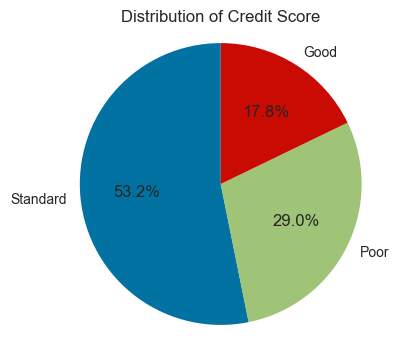

In [5]:
credit_score_counts = df['Credit_Score'].value_counts()
print(credit_score_counts)

plt.figure(figsize=(4, 4))
plt.pie(credit_score_counts, labels=credit_score_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Credit Score')
plt.axis('equal')  
plt.show()

In [6]:
# df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 'Good' if x in ['Good', 'Standard'] else x)

In [6]:
encoder = LabelEncoder()
df['Credit_Score'] = encoder.fit_transform(df['Credit_Score'])

In [7]:
credit_score= df['Credit_Score'].value_counts()
print(credit_score)

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64


In [8]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_data.drop(columns=['Credit_Score'])
y_train = train_data['Credit_Score']
X_val = val_data.drop(columns=['Credit_Score'])
y_val = val_data['Credit_Score']

In [9]:
print(f"Training set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")

Training set size: (80000, 25)
Validation set size: (20000, 25)


In [10]:
correlation_matrix = train_data.corr()
credit_score_correlation = correlation_matrix['Credit_Score'].sort_values(ascending=False)
print(credit_score_correlation)

Credit_Score                1.000000
Num_of_Delayed_Payment      0.200156
Changed_Credit_Limit        0.190159
Credit_Mix                  0.190120
Payment_of_Min_Amount       0.181876
Num_Bank_Accounts           0.172316
Interest_Rate               0.112076
Num_Credit_Card             0.106408
Delay_from_due_date         0.097621
Num_Credit_Inquiries        0.063410
Num_of_Loan                 0.061452
Outstanding_Debt            0.034924
Payment_Behaviour           0.020502
SSN                         0.011733
Occupation                  0.004283
Type_of_Loan               -0.006628
Credit_Utilization_Ratio   -0.014700
Annual_Income              -0.023191
Total_EMI_per_month        -0.027998
Month                      -0.033844
Age                        -0.052049
Monthly_Balance            -0.055069
Amount_invested_monthly    -0.069371
Monthly_Inhand_Salary      -0.078305
Credit_History_Age         -0.103336
Name: Credit_Score, dtype: float64


In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
print(y_train_resampled.value_counts())

Credit_Score
2    42575
0    42575
1    42575
Name: count, dtype: int64


Outstanding_Debt         0.101596
Interest_Rate            0.089873
Delay_from_due_date      0.067694
Credit_Mix               0.064206
Credit_History_Age       0.060171
Payment_of_Min_Amount    0.049258
Num_Credit_Inquiries     0.043994
Changed_Credit_Limit     0.043930
Num_of_Delayed_Payment   0.042932
Num_Bank_Accounts        0.035500
dtype: float64


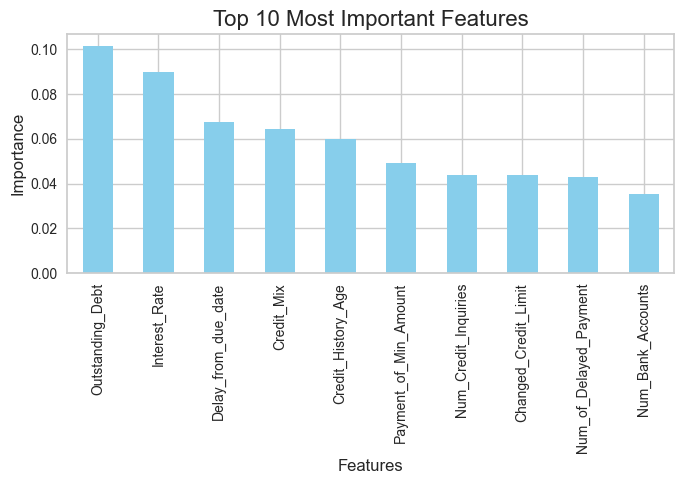

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model
rf.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Get the top 10 features based on importance
top_10_features = feature_importances.sort_values(ascending=False).head(10)
print(top_10_features)

# Plot the top 10 features
top_10_features.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

Accuracy: 0.7827
Precision: 0.7914
Recall: 0.7827
F1-Score: 0.7844
ROC AUC (OvR): 0.9126


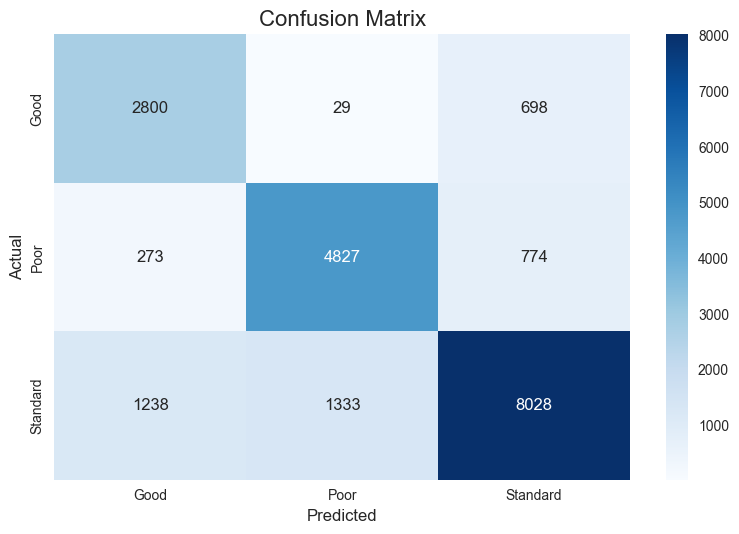


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      3527
           1       0.78      0.82      0.80      5874
           2       0.85      0.76      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.79      0.77     20000
weighted avg       0.79      0.78      0.78     20000



In [15]:
# Predictions
y_pred_rf = rf.predict(X_val)

# Metrics
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf, average='weighted')
recall = recall_score(y_val, y_pred_rf, average='weighted')
f1 = f1_score(y_val, y_pred_rf, average='weighted')
roc_auc = roc_auc_score(y_val, rf.predict_proba(X_val), multi_class='ovr')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC (OvR): {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

In [14]:
negative_class_count = (y_train == 0).sum()
positive_class_count = (y_train == 1).sum()
scale_pos_weight = negative_class_count / positive_class_count

Top 10 Features:
Outstanding_Debt: 1077.0
Interest_Rate: 1023.0
Delay_from_due_date: 891.0
SSN: 867.0
Total_EMI_per_month: 860.0
Changed_Credit_Limit: 829.0
Credit_History_Age: 816.0
Month: 751.0
Num_of_Delayed_Payment: 745.0
Type_of_Loan: 721.0


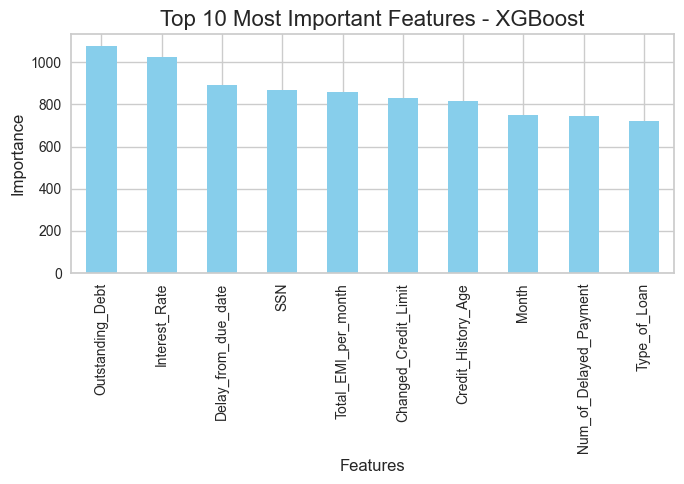

In [16]:
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)

params = {
    'objective': 'multi:softmax',  # Multi-class classification task
    'num_class': 3,  # Number of classes
    'eval_metric': 'mlogloss',  # Log loss for multi-class
    'tree_method': 'hist',  # Use GPU-based tree learning if possible
    'predictor': 'gpu_predictor',  # GPU predictor
    'gpu_id': 0,  # GPU index
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Feature importances
importance = xgb_model.get_score(importance_type='weight')
top_10_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features
print("Top 10 Features:")
for feature, score in top_10_features:
    print(f"{feature}: {score}")

# Plot top 10 features
top_features = pd.Series(dict(top_10_features))
top_features.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.title('Top 10 Most Important Features - XGBoost', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

Accuracy: 0.7020
Precision: 0.7197
Recall: 0.7020
F1-Score: 0.7050
Confusion Matrix:
[[2661   63  803]
 [ 494 4320 1060]
 [1689 1850 7060]]


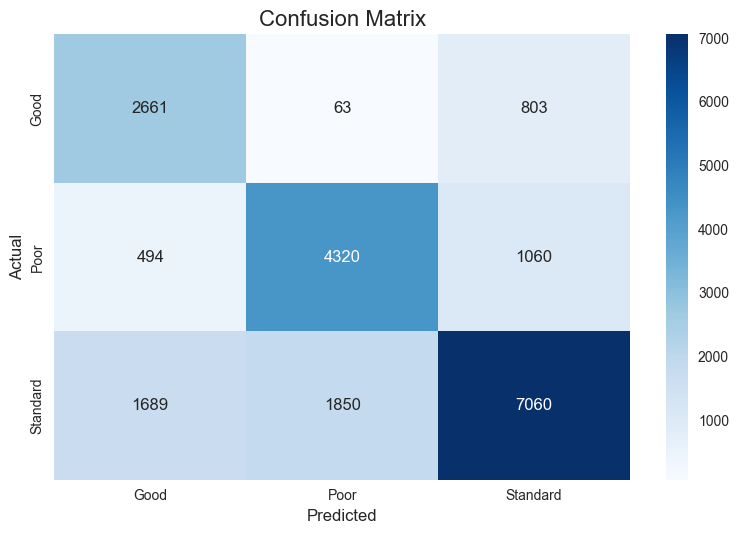


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.64      3527
           1       0.69      0.74      0.71      5874
           2       0.79      0.67      0.72     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.72      0.69     20000
weighted avg       0.72      0.70      0.71     20000



In [17]:

dval = xgb.DMatrix(X_val, label=y_val)
y_pred_xgb = xgb_model.predict(dval)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb, average='weighted')
recall = recall_score(y_val, y_pred_xgb, average='weighted')
f1 = f1_score(y_val, y_pred_xgb, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

In [16]:
selected_features = [
    'Outstanding_Debt', 
    'Interest_Rate', 
    'Delay_from_due_date', 
    'Monthly_Inhand_Salary', 
    'Num_Credit_Inquiries', 
    'Credit_History_Age', 
    'Changed_Credit_Limit', 
    'Num_of_Delayed_Payment', 
    'Type_of_Loan', 
    'Total_EMI_per_month'
]

In [17]:
df_selected = df[selected_features + ['Credit_Score']] 

df_selected.to_csv('../data/datasets_inter/train_features.csv', index=False)

print("Modified dataset saved as 'train_features.csv'.")

Modified dataset saved as 'train_features.csv'.


In [18]:
test_df = pd.read_csv('../data/processed/test_cleaned.csv')

test_df_selected = test_df[selected_features]

test_df_selected.to_csv('../data/datasets_inter/test_features.csv', index=False)

print("Test dataset saved as 'test_features.csv'.")

Test dataset saved as 'test_features.csv'.
